In [1]:
import skimage
import tensorflow as tf
import pandas as pd
import tarfile
import tqdm
import cv2
import os
import keras.layers
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer, Conv2D, Conv3D, MaxPool2D, UpSampling2D
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorboard
import keras.backend as K


In [2]:
celeb = pd.read_pickle("celeb40_full_identities_pickle")
images = celeb["images"]
images = np.stack(images)
embeddings = celeb["embeddings"]
embeddings = np.stack(embeddings)

In [3]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [4]:


IMG_SHAPE =images.shape[1:]
print(IMG_SHAPE)
print(np.prod(IMG_SHAPE))


code = Input((512,))
X = Dense(np.prod(IMG_SHAPE))(code)
reconstruction = Reshape(IMG_SHAPE)(X)

decoder = Model(code, reconstruction)


decoder.compile(optimizer="adamax", loss = 'mse')
print(decoder.summary())




(40, 40, 3)
4800
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense (Dense)               (None, 4800)              2462400   
                                                                 
 reshape (Reshape)           (None, 40, 40, 3)         0         
                                                                 
Total params: 2,462,400
Trainable params: 2,462,400
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
X_train = images[500:]
X_test = images[:500]
embeddings_train = embeddings[500:]
embeddings_test =  embeddings[:500]

In [16]:
X_train.shape

(23471, 40, 40, 3)

In [6]:
decoder.fit(x = embeddings_train, y = X_train, epochs = 5, validation_data = [embeddings_test, X_test])

Epoch 1/5
734/734 [==============================] - 17s 21ms/step - loss: 0.0327 - val_loss: 0.0303
Epoch 2/5
734/734 [==============================] - 15s 20ms/step - loss: 0.0298 - val_loss: 0.0298
Epoch 3/5
734/734 [==============================] - 15s 21ms/step - loss: 0.0295 - val_loss: 0.0298
Epoch 4/5
734/734 [==============================] - 15s 21ms/step - loss: 0.0295 - val_loss: 0.0298
Epoch 5/5
734/734 [==============================] - 15s 21ms/step - loss: 0.0295 - val_loss: 0.0297


In [7]:
#decoder = load_model("decoder_in_celeb2.h5")
decoder.save('decoder_celeb_500_onward.h5') #


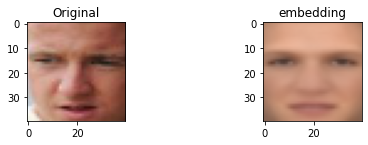

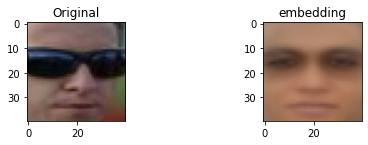

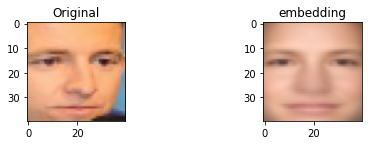

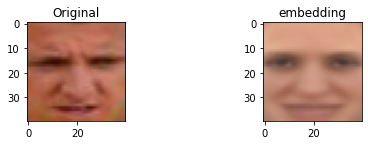

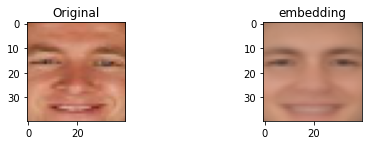

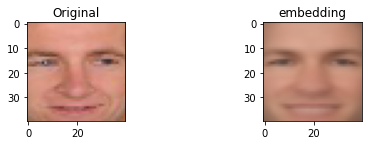

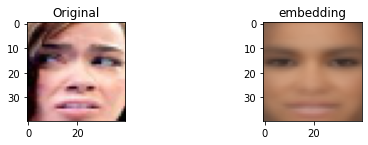

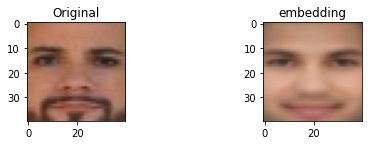

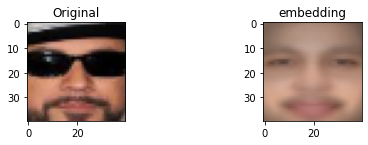

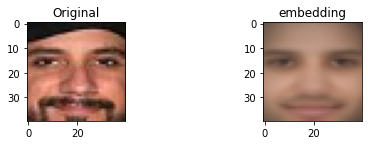

In [18]:
def visualize(img, emb, decoder):   #(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    
    #reco = encoder.predict(img[None])[0]
    #code = encoder.predict(img[None])[0]
    #reco = decoder.predict(code[None])[0]
    recoemb = decoder.predict(emb[None])[0]
    
#     kernel = np.array([[-1,-1,-1], 
#                    [-1, 9,-1],
#                    [-1,-1,-1]])
#     image_sharp = cv2.filter2D(reco, -1, kernel)

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

#     plt.subplot(1,3,2)
#     plt.title("Code")
#     plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    #plt.subplot(1,3,2)
    #plt.title("Reconstructed")
    #show_image(reco)
    
    plt.subplot(1,3,3) 
    plt.title("embedding")
    show_image(recoemb)
    plt.show()

    
#np.arange(100,110)
for i in range(10):
    img = X_test[i]
    emb = embeddings_test[i]
    visualize(img,emb, decoder) #(img,encoder,decoder)
    
#visualize(images[0], prototype, encoder, decoder)